/tmp/ipykernel_9944/2657577185.py:82: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(loc="upper right")
/tmp/ipykernel_9944/2657577185.py:108: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(loc="upper right")


Saved figure to nmr_spectra.pdf


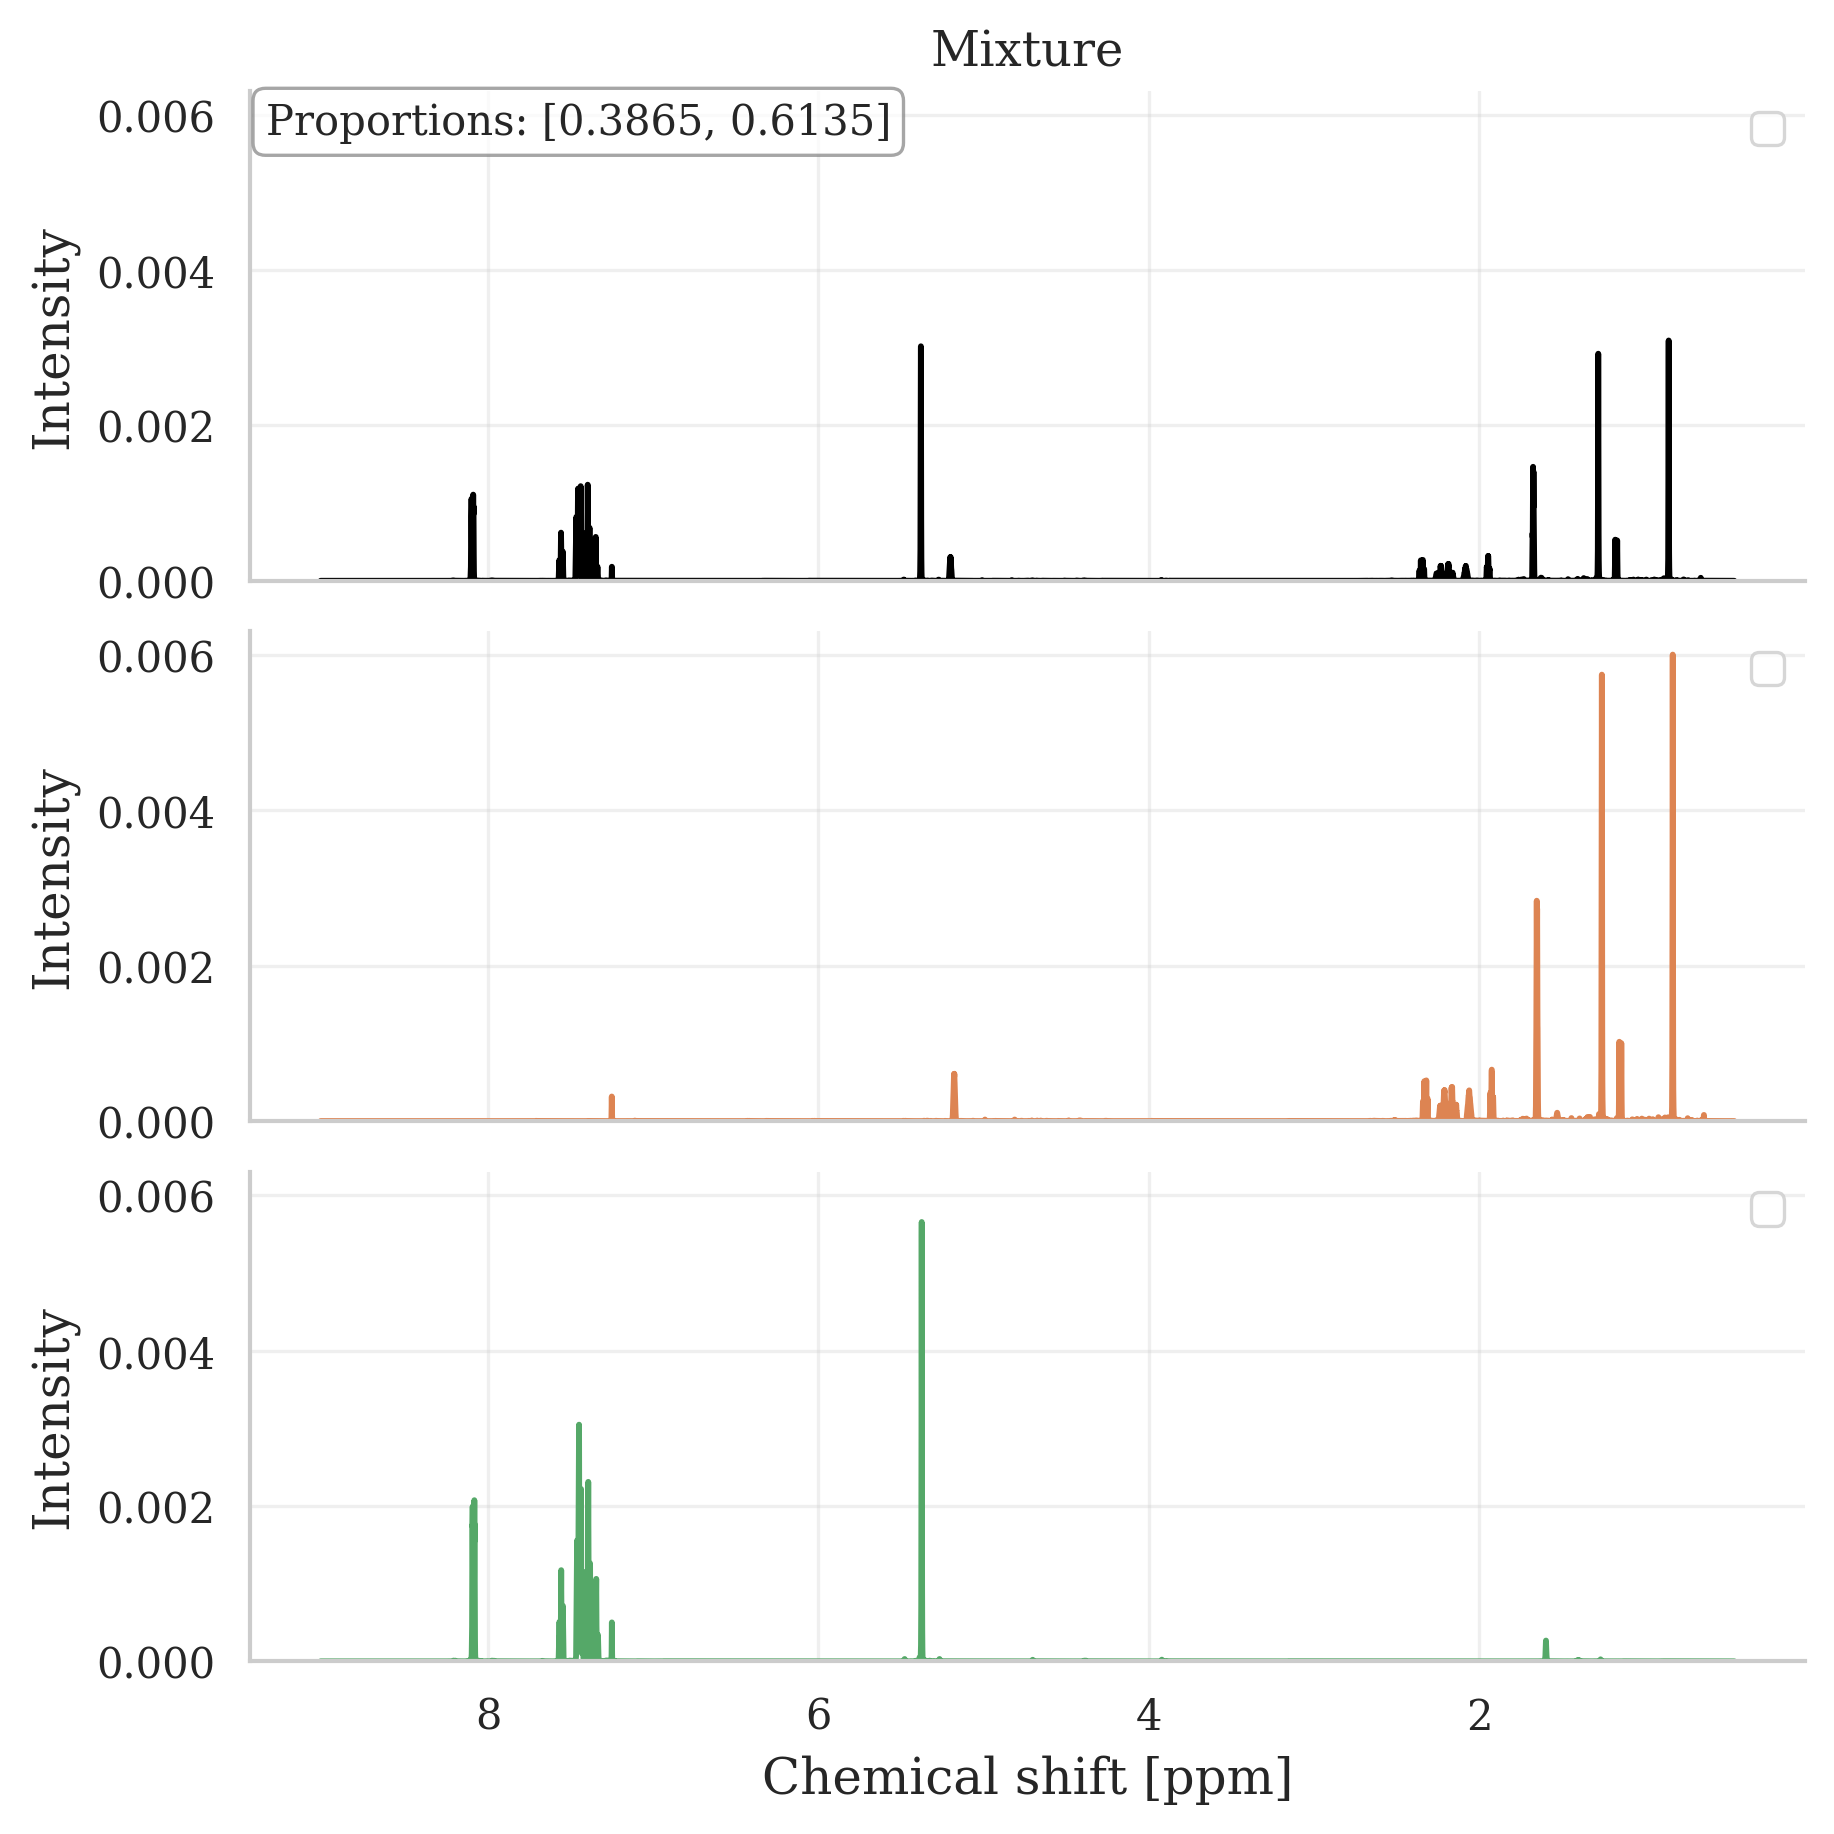

First 10 (ppm, intensity) of component 0: [(np.float64(0.457009), np.float64(1.528229306820996e-07)), (np.float64(0.457131), np.float64(1.2123352302240056e-07)), (np.float64(0.457253), np.float64(1.1059162033064253e-07)), (np.float64(0.457374), np.float64(9.99725490432446e-08)), (np.float64(0.457496), np.float64(9.365442068531171e-08)), (np.float64(0.457618), np.float64(8.733629232737883e-08)), (np.float64(0.457739), np.float64(1.2403407244641448e-07)), (np.float64(0.457861), np.float64(1.6073185256545014e-07)), (np.float64(0.457982), np.float64(2.3614336410202387e-07)), (np.float64(0.458104), np.float64(2.427302242599255e-07))]


In [ ]:
#!/usr/bin/env python3
import sys
import os
from typing import List

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl

# ─── Style Setup ────────────────────────────────────────────────────────────────
sns.set_theme(style="whitegrid", context="paper", font_scale=1.2)
mpl.rcParams.update(
    {
        "text.usetex": False,  # Use MathText, no external LaTeX
        "font.family": "serif",
        "axes.labelsize": 12,
        "font.size": 11,
        "legend.fontsize": 10,
        "xtick.labelsize": 10,
        "ytick.labelsize": 10,
        "lines.linewidth": 1.4,
        "axes.grid": True,
        "grid.alpha": 0.3,
        "figure.dpi": 300,
    }
)

# ─── Import Your Spectrum Classes ───────────────────────────────────────────────
sys.path.append(os.path.abspath(".."))
from wasserstein import NMRSpectrum

# ─── File / Component Setup ─────────────────────────────────────────────────────
components_names = ["Pinene", "Benzyl benzoate"]
protons_list = [16, 12]

mix_file = "preprocessed_mix.csv"
comp_files = ["preprocessed_comp0.csv", "preprocessed_comp1.csv"]

# ─── Load & Normalize Mixture ───────────────────────────────────────────────────
mix_data = np.loadtxt(mix_file, delimiter=",")
mix = NMRSpectrum(confs=list(zip(mix_data[:, 0], mix_data[:, 1])))
mix.trim_negative_intensities()
mix.normalize()

# ─── Load & Normalize Components ────────────────────────────────────────────────
spectra: List[NMRSpectrum] = []
for name, p, fn in zip(components_names, protons_list, comp_files):
    data = np.loadtxt(fn, delimiter=",")
    sp = NMRSpectrum(confs=list(zip(data[:, 0], data[:, 1])), protons=p)
    sp.trim_negative_intensities()
    sp.normalize()
    sp.label = name
    spectra.append(sp)

# ─── Determine global Y-limits for consistent scaling ────────────────────────────
all_ys = [y for _, y in mix.confs]
for sp in spectra:
    all_ys.extend([y for _, y in sp.confs])
ymin, ymax = 0, max(all_ys) * 1.05  # 5% headroom

# ─── Plotting ───────────────────────────────────────────────────────────────────
n_plots = 1 + len(spectra)
fig, axes = plt.subplots(
    nrows=n_plots,
    ncols=1,
    figsize=(6, 2 * n_plots),
    sharex=True,
    sharey=True,  # share y-axis across all
    constrained_layout=True,
)

# Mixture on top
ax = axes[0]
xs, ys = zip(*mix.confs)
ax.plot(xs, ys, color="black", label="Mixture")
ax.set_title("Mixture")
ax.invert_xaxis()
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.set_ylabel("Intensity")
ax.set_ylim(ymin, ymax)
ax.legend(loc="upper right")

props = [0.3865, 0.6135]
ax.text(
    0.01,
    0.98,
    r"Proportions: [{:.4f}, {:.4f}]".format(*props),
    transform=ax.transAxes,
    ha="left",
    va="top",
    fontsize=10,
    bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="gray", alpha=0.7),
)


# Components below
for idx, sp in enumerate(spectra, start=1):
    ax = axes[idx]
    xs, ys = zip(*sp.confs)
    ax.plot(xs, ys, color=f"C{idx}", label=sp.label)
    ax.set_title(sp.label)
    ax.invert_xaxis()
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.set_ylabel("Intensity")
    ax.set_ylim(ymin, ymax)
    ax.legend(loc="upper right")

# Common X label
axes[-1].set_xlabel("Chemical shift [ppm]")

# ─── Save & Show ───────────────────────────────────────────────────────────────
output_pdf = "nmr_spectra.pdf"
fig.savefig(output_pdf, bbox_inches="tight")
print(f"Saved figure to {output_pdf}")
plt.show()

# ─── Inspect First 10 Points of Component 0 ────────────────────────────────────
print("First 10 (ppm, intensity) of component 0:", spectra[0].confs[:10])
